In [5]:
from sklearn import tree;
from sklearn.datasets import load_wine;
from sklearn.model_selection import train_test_split
import pandas as pd;
import graphviz
import matplotlib.pyplot as plt
import sklearn
sklearn.__version__

'0.20.2'

In [2]:
#导入红酒数据集
wine=load_wine()
wine_df=pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#拆分数据集
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3)
x_train.shape
x_train
y_train

array([1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1])

In [4]:
#声明决策树模型
model=tree.DecisionTreeClassifier(
    criterion="entropy"
    ,random_state=30
    ,splitter="random"
    ,max_depth=5
    ,min_samples_leaf=10
    ,min_samples_split=10
)

In [7]:
#训练模型
model.fit(x_train,y_train)
print("score:",model.score(x_test,y_test))


score: 0.8703703703703703


In [17]:
wine.data[0]
print(model.predict_proba([wine.data[0]]))
print(model.predict([wine.data[0]]))

[[1. 0. 0.]]
[0]


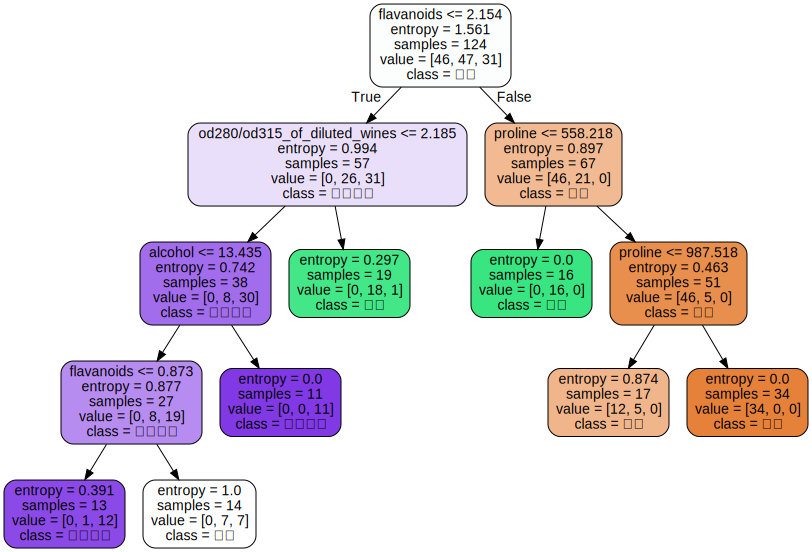

In [6]:
#输出决策树
dot_data=tree.export_graphviz(
    model
    ,feature_names=wine.feature_names
    ,class_names=['琴酒','雪莉','贝尔摩德']
    ,filled=True
    ,rounded=True
    ,out_file=None)
graph=graphviz.Source(dot_data)
graph